Goal: collect reviews for each season of stranger things on rotten tomatoes, use sentiment analysis to view if the reviews are more positive, neutral or negative and create a wordcloud of common words in the reviews


In [2]:
pip install webdriver_manager

     |████████████████████████████████| 127 kB 5.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.9
    Uninstalling urllib3-1.26.9:
      Successfully uninstalled urllib3-1.26.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
selenium 4.1.5 requires urllib3[secure,socks]~=1.26, but you have urllib3 1.25.11 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
pip install selenium

  Using cached urllib3-1.26.9-py2.py3-none-any.whl (138 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.25.11
    Uninstalling urllib3-1.25.11:
      Successfully uninstalled urllib3-1.25.11
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.9 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [4]:
import pandas as pd
from bs4 import BeautifulSoup
import requests,json, re
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')
stemmer = nltk.SnowballStemmer("english")

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [5]:
strangerThingsRTS1 = "https://www.rottentomatoes.com/tv/stranger_things/s01/reviews"

responseS1 = requests.get(strangerThingsRTS1)

soupS1 = BeautifulSoup(responseS1.text, 'html.parser')

soupS1.title.string

'Stranger Things: Season 1 - TV Reviews'

In [6]:
reviewsS1 = soupS1.findAll('div', {'class': 'critic__review-quote'})
print(reviewsS1)

[<div class="critic__review-quote" data-qa="review-quote">
                    Stranger Things succeeds on-screen in its first season. You'll get all of the timeless feels whether the show depicts the life you lived, the life you wanted after watching that decade's films...
                </div>, <div class="critic__review-quote" data-qa="review-quote">
                    To conclude, Stranger Things is a blast, thanks to its strong storytelling and high production values.
                </div>, <div class="critic__review-quote" data-qa="review-quote">
                    The Duffers' meticulous world-building pays off again and again... None of that would work without good characters, and Stranger Things has those in abundance.
                </div>, <div class="critic__review-quote" data-qa="review-quote">
                    Trust us, from the moment you press play on this one, you will be hooked in, and you may need to cancel all plans for the immediate future.
                

In [7]:
df = pd.DataFrame(reviewsS1)
print(df)

                                                    0
0   \r\n                    Stranger Things succee...
1   \r\n                    To conclude, Stranger ...
2   \r\n                    The Duffers' meticulou...
3   \r\n                    Trust us, from the mom...
4   \r\n                    SHENANIGANS ARE GOING ...
5   \r\n                    While deeply enjoyable...
6   \r\n                    Outstanding. All kille...
7   \r\n                    I was completely absor...
8   \r\n                    They will melt your he...
9   \r\n                    Despite being an old w...
10  \r\n                    The Duffers clearly un...
11  \r\n                    In all manners of ways...
12  \r\n                    Indeed, by the fifth e...
13  \r\n                    It's scary when it mea...
14  \r\n                    Stranger Things is a l...
15  \r\n                    Winona Ryder delivers ...
16  \r\n                    We all fell for it, an...
17  \r\n                    

In [9]:
df.columns = ['Reviews']
print(df)

df.to_csv("reviews.csv", sep=',', encoding = 'utf-8', columns=['Reviews'])

                                              Reviews
0   \r\n                    Stranger Things succee...
1   \r\n                    To conclude, Stranger ...
2   \r\n                    The Duffers' meticulou...
3   \r\n                    Trust us, from the mom...
4   \r\n                    SHENANIGANS ARE GOING ...
5   \r\n                    While deeply enjoyable...
6   \r\n                    Outstanding. All kille...
7   \r\n                    I was completely absor...
8   \r\n                    They will melt your he...
9   \r\n                    Despite being an old w...
10  \r\n                    The Duffers clearly un...
11  \r\n                    In all manners of ways...
12  \r\n                    Indeed, by the fifth e...
13  \r\n                    It's scary when it mea...
14  \r\n                    Stranger Things is a l...
15  \r\n                    Winona Ryder delivers ...
16  \r\n                    We all fell for it, an...
17  \r\n                    

In [10]:
data = pd.read_csv("reviews.csv", error_bad_lines=False,engine="python")
print(data.head())

   Unnamed: 0                                            Reviews
0           0  \r\n                    Stranger Things succee...
1           1  \r\n                    To conclude, Stranger ...
2           2  \r\n                    The Duffers' meticulou...
3           3  \r\n                    Trust us, from the mom...
4           4  \r\n                    SHENANIGANS ARE GOING ...


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [11]:
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Reviews"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Reviews"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Reviews"]]
print(data.head())

   Unnamed: 0                                            Reviews  Positive  \
0           0  \r\n                    Stranger Things succee...     0.094   
1           1  \r\n                    To conclude, Stranger ...     0.426   
2           2  \r\n                    The Duffers' meticulou...     0.000   
3           3  \r\n                    Trust us, from the mom...     0.174   
4           4  \r\n                    SHENANIGANS ARE GOING ...     0.000   

   Negative  Neutral  
0     0.000    0.906  
1     0.000    0.574  
2     0.095    0.905  
3     0.061    0.765  
4     0.000    1.000  


In [12]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Mostly Positive Wording")
    elif (b>a) and (b>c):
        print("Mostly Negative Wording ")
    else:
        print("Mostly informative")
sentiment_score(x, y, z)

print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Mostly informative
Positive:  2.948
Negative:  1.484
Neutral:  15.566999999999998


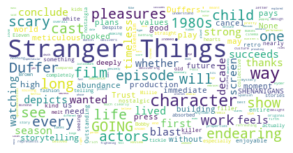

In [13]:
text = " ".join(i for i in data.Reviews)

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(5,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [14]:
from nltk.corpus import stopwords
import string
import re
nltk.download('stopwords')
nltk.download('vader_lexicon')
stemmer = nltk.SnowballStemmer("english") #must reimport to use stopwords again

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


What happens after cleaning the data?

In [15]:
stopword=set(stopwords.words('english'))
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text   
#cleaning code from: https://thecleverprogrammer.com/2022/04/12/tiktok-reviews-sentiment-analysis-using-python/

In [16]:
data = pd.read_csv("reviews.csv", error_bad_lines=False,engine="python")
print(data.head())


   Unnamed: 0                                            Reviews
0           0  \r\n                    Stranger Things succee...
1           1  \r\n                    To conclude, Stranger ...
2           2  \r\n                    The Duffers' meticulou...
3           3  \r\n                    Trust us, from the mom...
4           4  \r\n                    SHENANIGANS ARE GOING ...


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [17]:
print(data.isnull().sum()) #no null values so no need to drop null values

Unnamed: 0    0
Reviews       0
dtype: int64


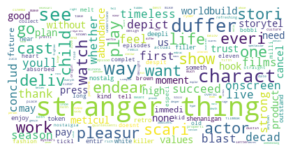

In [18]:
data["Reviews"] = data["Reviews"].apply(clean)
text = " ".join(i for i in data.Reviews)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(5,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [19]:
'''check if sentiments have changed now stopwords removed'''

sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Reviews"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Reviews"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Reviews"]]
print(data.head())

   Unnamed: 0                                            Reviews  Positive  \
0           0  \r                    stranger thing succeed o...     0.200   
1           1  \r                    conclud stranger thing b...     0.548   
2           2  \r                    duffer meticul worldbuil...     0.000   
3           3  \r                    trust us moment press pl...     0.322   
4           4  \r                    shenanigan go down\r    ...     0.000   

   Negative  Neutral  
0     0.000    0.800  
1     0.000    0.452  
2     0.257    0.743  
3     0.113    0.565  
4     0.000    1.000  


In [20]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Mostly Positive Wording")
    elif (b>a) and (b>c):
        print("Mostly Negative Wording ")
    else:
        print("Mostly informative")
sentiment_score(x, y, z)

print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Mostly informative
Positive:  3.548
Negative:  1.713
Neutral:  14.739


A lot of this code was borrowed from: 

https://thecleverprogrammer.com/2022/04/12/tiktok-reviews-sentiment-analysis-using-python/

as i have been learning from the tutorials on that website including the tiktok one.


In [22]:
#Now for season 2 reviews https://www.rottentomatoes.com/tv/stranger_things/s02/reviews

strangerThingsRTS2 = "https://www.rottentomatoes.com/tv/stranger_things/s02/reviews"

responseS2 = requests.get(strangerThingsRTS2)

soupS2 = BeautifulSoup(responseS2.text, 'html.parser')

reviewsS2 = soupS2.findAll('div', {'class': 'critic__review-quote'})
print(reviewsS2)

df2 = pd.DataFrame(reviewsS2)

df2.columns = ['Reviews']
print(df2)

[<div class="critic__review-quote" data-qa="review-quote">
                    The end of Stranger Things S2 slays whatever early-season nitpicks existed.
                </div>, <div class="critic__review-quote" data-qa="review-quote">
                    This was a near perfect season and Stranger Things will only get bigger...and stranger.
                </div>, <div class="critic__review-quote" data-qa="review-quote">
                    What this season does so well really is that it manages to not mess with what made Stranger Things so good in the first place.
                </div>, <div class="critic__review-quote" data-qa="review-quote">
                    The women are complex and well-rounded but they remain, unfortunately, in service to the men and boys of the show.
                </div>, <div class="critic__review-quote" data-qa="review-quote">
                    Another compelling season with a story that is even stronger than the first, as the creators did not have t

In [23]:
df2.to_csv("reviewsS2.csv", sep=',', encoding = 'utf-8', columns=['Reviews'])

In [25]:
dataS2 = pd.read_csv("reviewsS2.csv", error_bad_lines=False,engine="python")
print(dataS2.head())

   Unnamed: 0                                            Reviews
0           0  \r\n                    The end of Stranger Th...
1           1  \r\n                    This was a near perfec...
2           2  \r\n                    What this season does ...
3           3  \r\n                    The women are complex ...
4           4  \r\n                    Another compelling sea...


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [26]:
sentiments = SentimentIntensityAnalyzer()
dataS2["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in dataS2["Reviews"]]
dataS2["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in dataS2["Reviews"]]
dataS2["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in dataS2["Reviews"]]
print(dataS2.head())

   Unnamed: 0                                            Reviews  Positive  \
0           0  \r\n                    The end of Stranger Th...     0.000   
1           1  \r\n                    This was a near perfec...     0.236   
2           2  \r\n                    What this season does ...     0.281   
3           3  \r\n                    The women are complex ...     0.000   
4           4  \r\n                    Another compelling sea...     0.170   

   Negative  Neutral  
0      0.00    1.000  
1      0.00    0.764  
2      0.00    0.719  
3      0.14    0.860  
4      0.00    0.830  


In [27]:
x = sum(dataS2["Positive"])
y = sum(dataS2["Negative"])
z = sum(dataS2["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Mostly Positive Wording")
    elif (b>a) and (b>c):
        print("Mostly Negative Wording ")
    else:
        print("Mostly informative")
sentiment_score(x, y, z)

print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Mostly informative
Positive:  4.219
Negative:  0.692
Neutral:  15.089000000000002


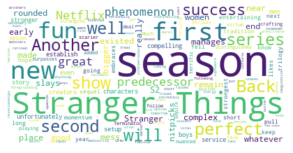

In [28]:
text = " ".join(i for i in dataS2.Reviews)

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(5,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now after cleaning:



In [29]:
dataS2 = pd.read_csv("reviewsS2.csv", error_bad_lines=False,engine="python")
dataS2["Reviews"] = dataS2["Reviews"].apply(clean)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


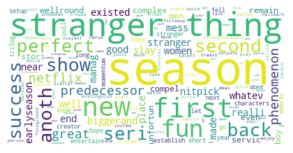

In [30]:
text = " ".join(i for i in dataS2.Reviews)

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(5,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [31]:
sentiments = SentimentIntensityAnalyzer()
dataS2["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in dataS2["Reviews"]]
dataS2["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in dataS2["Reviews"]]
dataS2["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in dataS2["Reviews"]]
print(dataS2.head())

   Unnamed: 0                                            Reviews  Positive  \
0           0  \r                    end stranger thing  slay...     0.000   
1           1  \r                    near perfect season stra...     0.346   
2           2  \r                    season well realli manag...     0.323   
3           3  \r                    women complex wellround ...     0.000   
4           4  \r                    anoth compel season stor...     0.206   

   Negative  Neutral  
0     0.000    1.000  
1     0.000    0.654  
2     0.161    0.516  
3     0.000    1.000  
4     0.000    0.794  


In [32]:
x = sum(dataS2["Positive"])
y = sum(dataS2["Negative"])
z = sum(dataS2["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Mostly Positive Wording")
    elif (b>a) and (b>c):
        print("Mostly Negative Wording ")
    else:
        print("Mostly informative")
sentiment_score(x, y, z)

print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Mostly informative
Positive:  5.745000000000001
Negative:  1.0170000000000001
Neutral:  13.237


Now for season 3: 

In [35]:
#Now for season 3 reviews https://www.rottentomatoes.com/tv/stranger_things/s02/reviews
strangerThingsRTS3 = "https://www.rottentomatoes.com/tv/stranger_things/s03/reviews"
responseS3 = requests.get(strangerThingsRTS3)
soupS3 = BeautifulSoup(responseS3.text, 'html.parser')
reviewsS3 = soupS3.findAll('div', {'class': 'critic__review-quote'})
df3 = pd.DataFrame(reviewsS3)
df3.columns = ['Reviews']
print(df3)

                                              Reviews
0   \r\n                    Stranger Things 3 is a...
1   \r\n                    The only dimension tha...
2   \r\n                    It's not only a solid ...
3   \r\n                    It's rare to see young...
4   \r\n                    The amount of pop cult...
5   \r\n                    As Stranger Things has...
6   \r\n                    I love this cast so mu...
7   \r\n                    It's my favorite seaso...
8   \r\n                    With risk comes reward...
9   \r\n                    It isn't the psychokin...
10  \r\n                    Even while some things...
11  \r\n                    The season makes cryst...
12  \r\n                    It's a fun ride that w...
13  \r\n                    It was the right mixtu...
14  \r\n                    Scripting issues aboun...
15  \r\n                    The scope is bigger, t...
16  \r\n                    After a lackluster sop...
17  \r\n                    

In [36]:
df3.to_csv("reviewsS3.csv", sep=',', encoding = 'utf-8', columns=['Reviews'])

In [37]:
dataS3 = pd.read_csv("reviewsS3.csv", error_bad_lines=False,engine="python")
print(dataS3.head()) 

   Unnamed: 0                                            Reviews
0           0  \r\n                    Stranger Things 3 is a...
1           1  \r\n                    The only dimension tha...
2           2  \r\n                    It's not only a solid ...
3           3  \r\n                    It's rare to see young...
4           4  \r\n                    The amount of pop cult...


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [38]:
#clean data right away this time
dataS3["Reviews"] = dataS3["Reviews"].apply(clean)

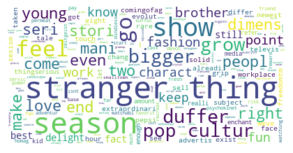

In [39]:
text = " ".join(i for i in dataS3.Reviews)

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(5,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

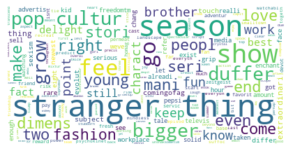

In [40]:
def make_cloud(text):
  stopwords = set(STOPWORDS)
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show() #use function instead of duplicate code

In [41]:
sentiments = SentimentIntensityAnalyzer()
dataS3["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in dataS3["Reviews"]]
dataS3["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in dataS3["Reviews"]]
dataS3["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in dataS3["Reviews"]]
print(dataS3.head())

x = sum(dataS3["Positive"])
y = sum(dataS3["Negative"])
z = sum(dataS3["Neutral"])

sentiment_score(x,y,z)

   Unnamed: 0                                            Reviews  Positive  \
0           0  \r                    stranger thing  extraord...     0.000   
1           1  \r                    dimens stranger thing ex...     0.000   
2           2  \r                    solid eight hour televis...     0.127   
3           3  \r                    rare see young peopl tak...     0.000   
4           4  \r                    amount pop cultur refer ...     0.000   

   Negative  Neutral  
0     0.000    1.000  
1     0.000    1.000  
2     0.000    0.873  
3     0.091    0.909  
4     0.000    1.000  
Mostly informative


# Analysing Audience Reviews of Season 3

In [57]:

audienceReviews = "https://www.rottentomatoes.com/tv/stranger_things/s03/reviews?type=user"
audience_response = requests.get(audienceReviews)
audience_soup = BeautifulSoup(audience_response.text,'html.parser')
review_content = audience_soup.findAll('p', {"class": 'audience-reviews__review--mobile js-review-text clamp clamp-4 js-clamp'})
dataframe = pd.DataFrame(review_content)
dataframe.columns = ['Reviews']
dataframe.tail()

,Reviews
5,Stranger Things 3 is more fun and more frighte...
6,A season that uses everything great about the ...
7,I value that each season is different tonally....
8,It becomes predictable if you have seen the ot...
9,The attachment to the beloved characters only ...


In [56]:
dataframe.isnull().sum() #no null values so carry on, no need to drop

Reviews    0
dtype: int64

In [58]:
dataframe.to_csv("audienceReviews.csv", sep=',', encoding = 'utf-8', columns=['Reviews'])

In [60]:
audience_data = pd.read_csv('audienceReviews.csv', error_bad_lines=False,engine='python')
print(audience_data)

   Unnamed: 0                                            Reviews
0           0                Best season in my opinion I love it
1           1        Great show, one of the best seasons so far!
2           2                        Wow this is the best series
3           3        I love this show so much it is just amazing
4           4  Stranger Things 3:\nI wish there was a rating ...
5           5  Stranger Things 3 is more fun and more frighte...
6           6  A season that uses everything great about the ...
7           7  I value that each season is different tonally....
8           8  It becomes predictable if you have seen the ot...
9           9  The attachment to the beloved characters only ...


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [61]:
audience_data["Reviews"] = audience_data["Reviews"].apply(clean)
print(audience_data)

   Unnamed: 0                                            Reviews
0           0                           best season opinion love
1           1                     great show one best season far
2           2                                      wow best seri
3           3                                love show much amaz
4           4  stranger thing  wish rate   season better seas...
5           5  stranger thing  fun frighten pitch perfect pac...
6           6  season use everyth great previous season make ...
7           7  valu season differ tonal one benefit look like...
8           8  becom predict seen two season like watch argum...
9           9  attach belov charact get deeper season  strang...


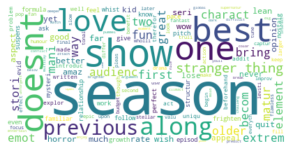

In [63]:
text = " ".join(i for i in audience_data.Reviews)
make_cloud(text)

In [64]:
sentiments = SentimentIntensityAnalyzer()
audience_data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in audience_data["Reviews"]]
audience_data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in audience_data["Reviews"]]
audience_data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in audience_data["Reviews"]]
print(audience_data.head())

x = sum(audience_data["Positive"])
y = sum(audience_data["Negative"])
z = sum(audience_data["Neutral"])

sentiment_score(x,y,z)

   Unnamed: 0                                            Reviews  Positive  \
0           0                           best season opinion love     0.808   
1           1                     great show one best season far     0.675   
2           2                                      wow best seri     0.889   
3           3                                love show much amaz     0.583   
4           4  stranger thing  wish rate   season better seas...     0.335   

   Negative  Neutral  
0     0.000    0.192  
1     0.000    0.325  
2     0.000    0.111  
3     0.000    0.417  
4     0.083    0.582  
Mostly informative
